# Zomato Sales Analysis

In [2]:
from pandas import pivot_table
from pandas.core.interchange.dataframe_protocol import DataFrame

print("Hello World!")


Hello World!


In [3]:
 import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
df = pd.read_csv('Zomato data .csv')

In [8]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
#to convert 4.1/5 to only 4.1
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
#What type of restaurant do the majority of customers order from?
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

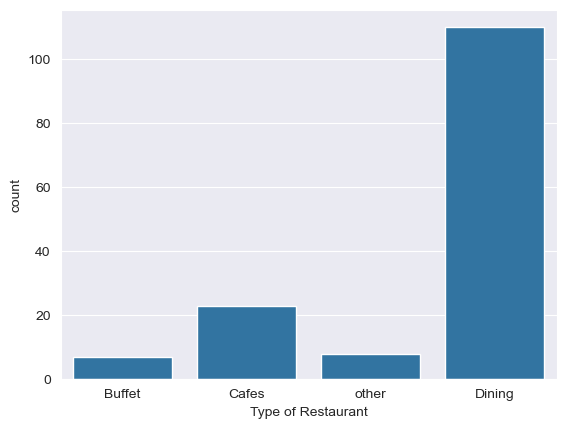

In [13]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

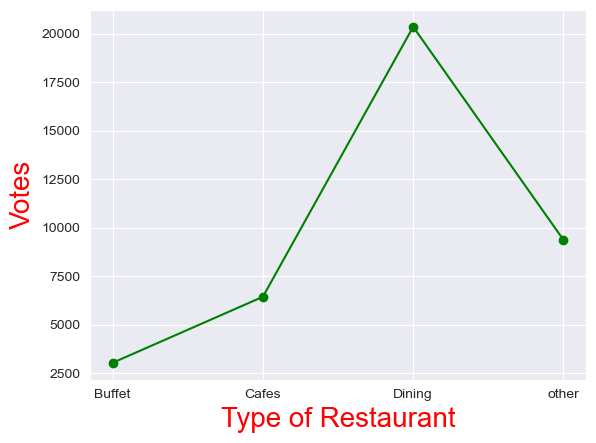

In [21]:
#how many votes has each type of restaurant recieved from customer?
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of Restaurant",c='red',size=20)
plt.ylabel('Votes', c='red',size=20) 

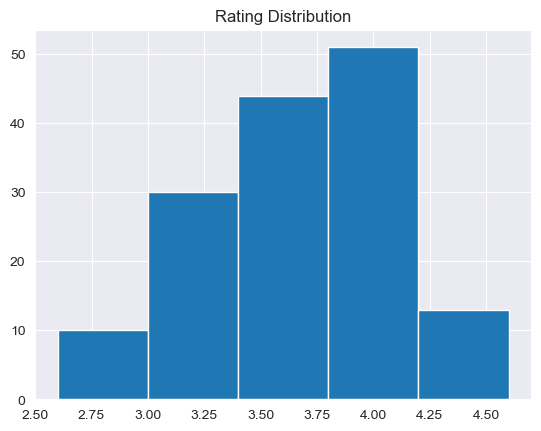

In [22]:
#What are the ratings that the majority of restaurants have recieved?
plt.hist(df['rate'],bins=5)
plt.title('Rating Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

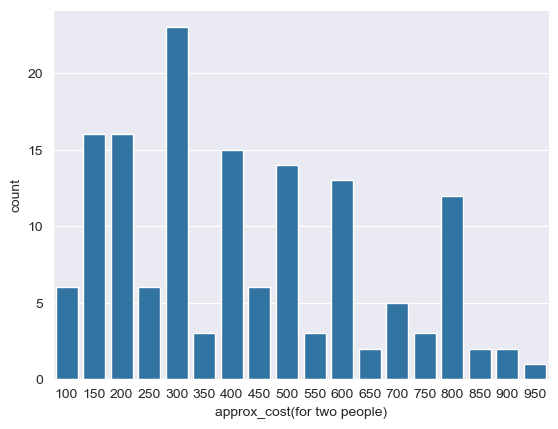

In [28]:
#Zomato has observed that most couples order most of their food online. What is their average spending on each order

couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

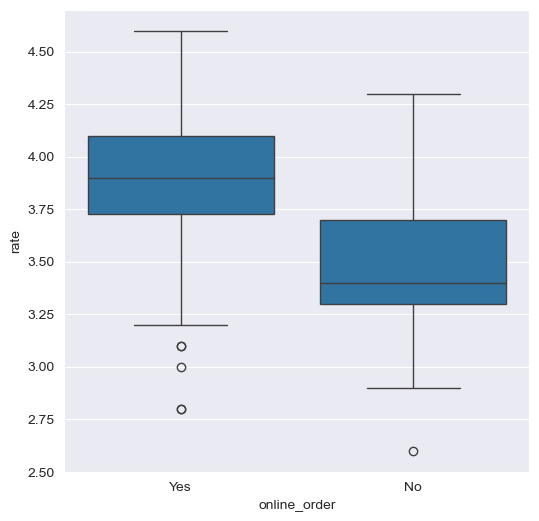

In [26]:
 # which mode(online or offline) has recieved maximum rating?
 plt.figure(figsize = (6,6))
 sns.boxplot(x='online_order',y='rate',data=df)

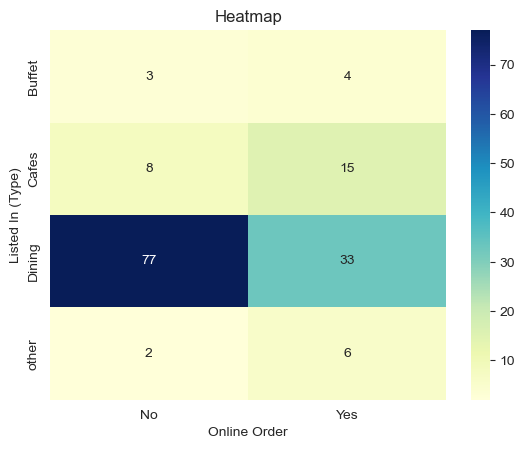

In [27]:
# Which type of restaurant recieved more offline orders, so that Zomato can please customers with some good offers?
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()